# Importing Libraries

**Pandas:** It is used primarily for data manipulation, including loading and handling the dataset. Here it is used especially for importing and reading the csv file.

**Numpy:** It is used for numerical operations and calculations.

**Matplotlib:** It is used for creating various types of plots and visualizations.

**Seaborn:** It is used for creating more informative statistical graphics. It's used to create histograms and scatter plots for univariate and bivariate analysis.

**Scikit-Learn:** It is used for model selection and evaluation. Here it is used to split the dataset into 'test' and 'training' datasets. It is also used for building the linear regression model as well as the in prediction. It is also used for model evaluation by calculating mean squared error and r2 score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading .csv File

We use read_csv() to read the file. Trying out a few basic features of csv, we can print the head() of the file, to find the shape of the file, and get summary of the dataframe.

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('student_extended_ml_dataset2.csv')
# Head
print(df.head())
# Shape
print(df.shape)
# Summary
print(df.info())

                Name  Age  Gender  Hours_Studied   IQ  Physics_Marks  \
0       Jason Vargas   19    Male       8.140821   92             87   
1     Sandra Wiggins   35  Female       9.825626  112             86   
2        Julia Olsen   33    Male       8.835372  131             87   
3  Robert Pennington   33    Male       2.482483  138             70   
4      Kayla Sellers   28  Female       4.419793   90             95   

   Math_Marks  Chemistry_Marks  Has_Part_Time_Job Study_Hours_Group  
0          43               85               True              High  
1          81               54              False              High  
2          52               57               True              High  
3          86               83              False               Low  
4          48               83               True               Low  
(5000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-N

# Explore Data: Univariate Analysis

I have explored individual features to understand their distributions by creating histograms, box plots, or count plots for each relevant feature. Specifically here, I have focused on Number of Hours Studied.

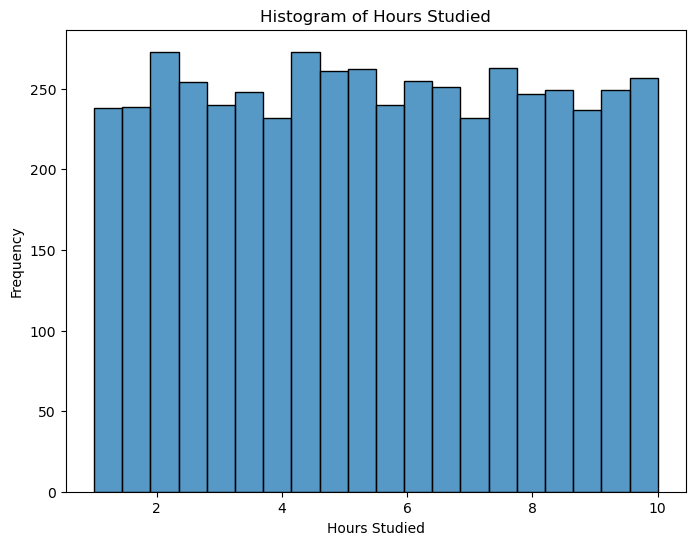

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Hours_Studied'], bins=20)
plt.title('Histogram of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

# Explore Data: Bivariate Analysis

Here I examine relationships between pairs of variables using scatter plots or correlation matrices. The pair chosen here is: Hours_Studied and Physics_Marks.

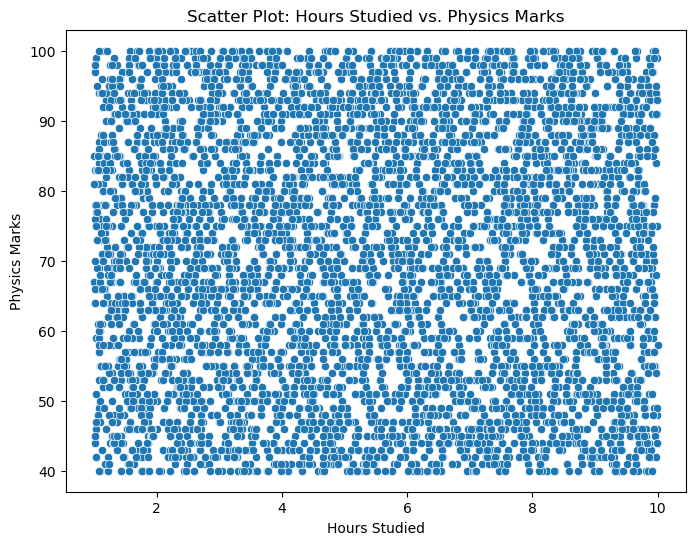

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Physics_Marks', data=df)
plt.title('Scatter Plot: Hours Studied vs. Physics Marks')
plt.xlabel('Hours Studied')
plt.ylabel('Physics Marks')
plt.show()

# Explore Data: Mutlivariate Analysis

Here I examine relationships between multiple variables using a pairwise scatter plot. The conditions chosen here are: Hours_Studied, Physics_Marks and IQ.

<Figure size 800x600 with 0 Axes>

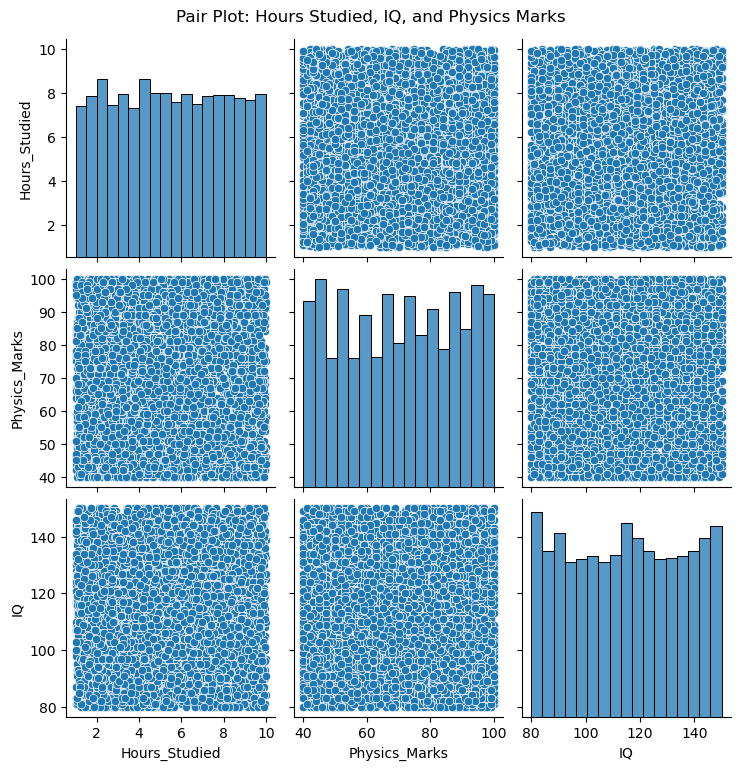

In [10]:
plt.figure(figsize=(8, 6))
sns.pairplot(df[['Hours_Studied','Physics_Marks','IQ']])
plt.suptitle('Pair Plot: Hours Studied, IQ, and Physics Marks', y=1.02)
plt.show()

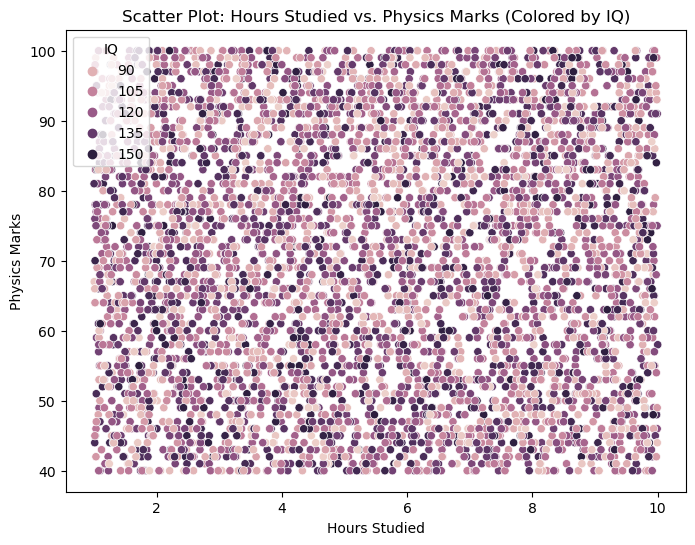

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Physics_Marks', hue='IQ', data=df)
plt.title('Scatter Plot: Hours Studied vs. Physics Marks (Colored by IQ)')
plt.xlabel('Hours Studied')
plt.ylabel('Physics Marks')
plt.legend(title='IQ')
plt.show()

# Data Processing and Model Building using Linear Regression

First step here is to split the data into a training and testing set. The next is to train and develope the model using Linear Regression.
Linear Regression - Linear Regression is a statistical technique which is establish a linear relationship between a target variable (in this case, "Physics Marks") and one or more predictor variables (features like "Hours_Studied," "IQ," and "Has_Part_Time_Job") This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable. The fundamental idea behind linear regression is to find the best-fitting straight line (linear equation) that represents how changes in the predictor variables impact the target variable.
In this project, The goal is to build a model that can predict a student's physics marks based on their study habits (Hours_Studied), cognitive abilities (IQ), and whether they have part-time jobs (Has_Part_Time_Job). The linear regression model identifies the linear equation that minimizes the difference between the predicted and actual physics marks.

1. **Data Preparation** The dataset is loaded and split into training and testing sets. The features (hours studied, IQ, and part-time job) are selected as independent variables (X), and physics marks are the dependent variable (y).

2. **Model Training:** A linear regression model is created and trained using the training data. The model learns the coefficients for each predictor variable, which represent the impact of each feature on physics marks.

3. **Model Prediction:** The trained model is used to predict physics marks for the testing data based on the input features.

4. **Model Evaluation:** Mean Squared Error (MSE) and R-squared (R2) are calculated to assess how well the model's predictions align with the actual physics marks. MSE measures prediction accuracy, while R2 indicates the goodness of fit.

4.1 RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error.

4.2 R2 Score is another metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models.

In [12]:
# Split the data into training and testing sets
X = df[['Hours_Studied', 'IQ', 'Has_Part_Time_Job']]  # Features
y = df['Physics_Marks']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 319.8431304930745
R-squared: -0.0035477106729939756


# Data Visualisation and Making Predictions

Visualising the actual data vs the predictions made for Physics_Marks in this case.

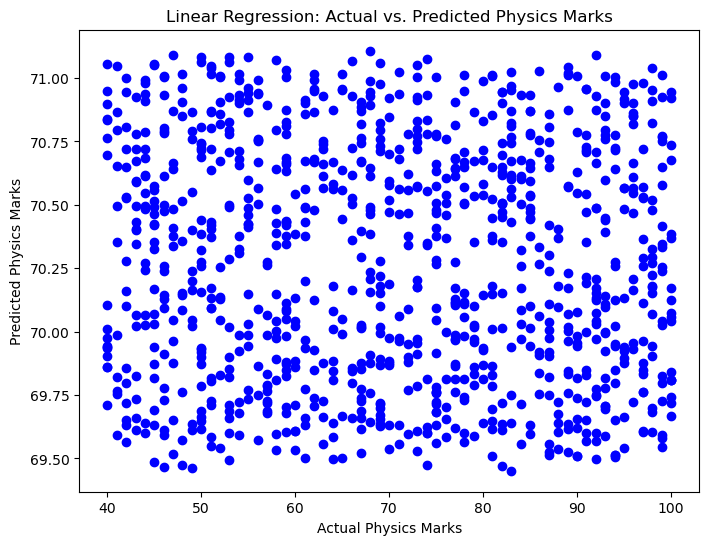

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Linear Regression: Actual vs. Predicted Physics Marks')
plt.xlabel('Actual Physics Marks')
plt.ylabel('Predicted Physics Marks')
plt.show()

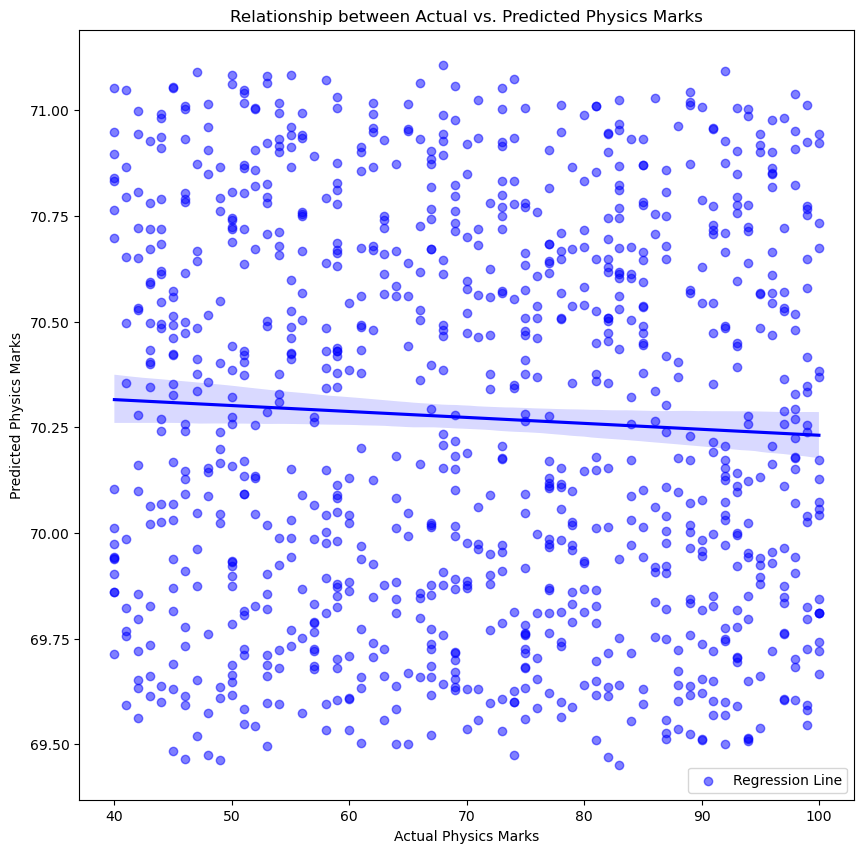

In [17]:
# Plotting with Regression Line
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test,y=y_pred, color = 'blue', scatter_kws={'alpha':0.5}, label='Regression Line')
plt.title('Relationship between Actual vs. Predicted Physics Marks')
plt.xlabel('Actual Physics Marks')
plt.ylabel('Predicted Physics Marks')
plt.legend(loc=4)
plt.show()